<a href="https://colab.research.google.com/github/charlie11438/note/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/Drive',force_remount=True)

Mounted at /content/Drive


In [4]:
!cd 'Drive/My Drive';ls -l

total 3205
-rw------- 1 root root  103006 Apr 27 08:23  1129pyplot_test.ipynb
-rw------- 1 root root  246115 May  9 06:35  Avocado.pdf
drwx------ 2 root root    4096 May  6 12:06 'Colab Notebooks'
drwx------ 2 root root    4096 Jan 20 11:05  Data_Analysis
-rw------- 1 root root   35501 May 17 03:44  distribution.png
drwx------ 2 root root    4096 Jan  8 04:09 'economy exam'
drwx------ 2 root root    4096 May  5 13:40  Game
-rw------- 1 root root  176501 May  9 06:35  GooglePlay.pdf
-rw------- 1 root root   21147 Apr 24 06:43  Linux.docx
-rw------- 1 root root  332488 Apr 24 06:43  Linux.pdf
drwx------ 2 root root    4096 Nov  3  2018  Manage
-rw------- 1 root root   17000 Apr 27 08:23  mat_ch1.ipynb
-rw------- 1 root root   27396 Apr 27 08:23  mat_ch2.ipynb
-rw------- 1 root root   19576 Apr 27 08:23  mat_ch3.ipynb
-rw------- 1 root root   19454 Apr 27 08:23  mat_ch4.ipynb
-rw------- 1 root root   21564 Apr 27 08:23  mat_ch5.ipynb
-rw------- 1 root root  158202 Apr 27 08:23  mat_ch6.ip

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
original=pd.read_csv('./Drive/My Drive/who_suicide_statistics.csv')

In [7]:
print(original.head())
print(original.shape)
print(original.isnull().sum())
print(original.dtypes)

   country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0
(43776, 6)
country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64
country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object


In [0]:
original['suicides_no']=original['suicides_no'].fillna(original['suicides_no'].median())
original['population']=original['population'].fillna(original['population'].median())
original['year']=original['year'].astype('str')

In [10]:
print(original.isnull().sum())
print(original.dtypes)

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64
country         object
year            object
sex             object
age             object
suicides_no    float64
population     float64
dtype: object


In [0]:
descri=original.describe()
descri.loc['skewness']=original.skew()
descri.loc['kurtosis']=original.kurt()

In [12]:
print(descri)

           suicides_no    population
count     43776.000000  4.377600e+04
mean        184.074356  1.504013e+06
std         780.694599  3.438451e+06
min           0.000000  2.590000e+02
25%           1.000000  1.184982e+05
50%          14.000000  3.806550e+05
75%          83.000000  1.067009e+06
max       22338.000000  4.380521e+07
skewness     11.854262  4.992769e+00
kurtosis    206.095082  3.456880e+01


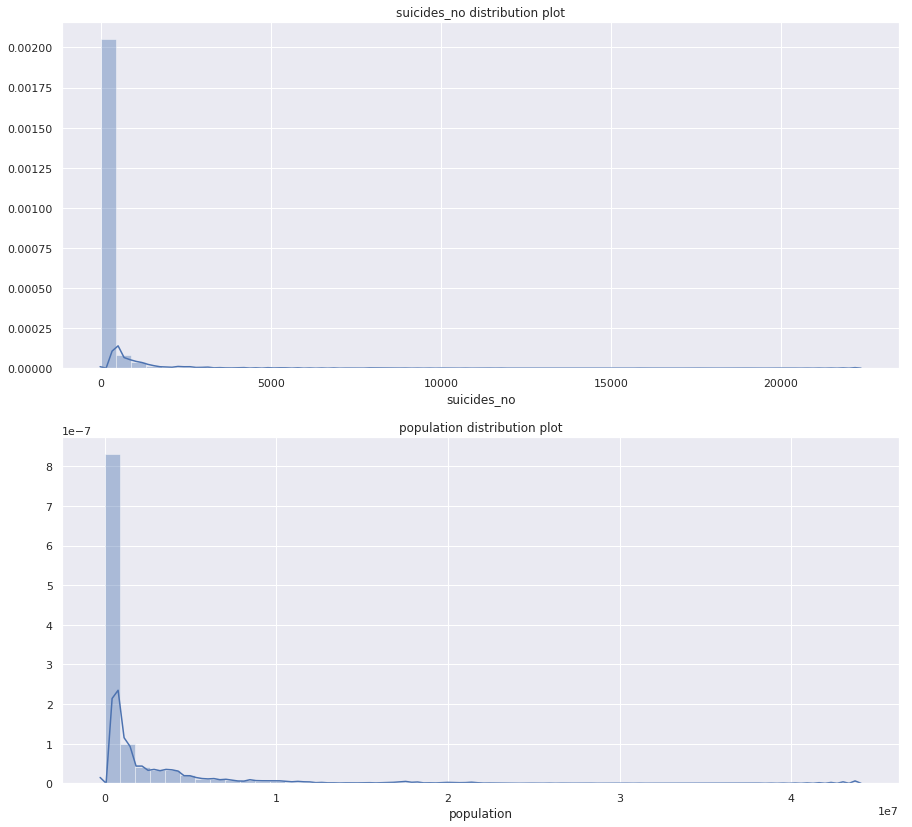

In [24]:
z0=plt.figure(figsize=(15,14))
z0.add_subplot(2,1,1)
sns.distplot(original['suicides_no'])
plt.title('suicides_no distribution plot')
z0.add_subplot(2,1,2)
sns.distplot(original['population'])
plt.title('population distribution plot')
z0.savefig(r'/content/Drive/My Drive/distributionplot_2.png')
plt.show()

In [25]:
original.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,14.0,277900.0
1,Albania,1985,female,25-34 years,14.0,246800.0
2,Albania,1985,female,35-54 years,14.0,267500.0
3,Albania,1985,female,5-14 years,14.0,298300.0
4,Albania,1985,female,55-74 years,14.0,138700.0


In [27]:
sexPivot=pd.pivot_table(original,index='year',columns='sex',values='suicides_no',aggfunc=np.sum)
sexPivot.tail()

sex,female,male
year,,
2012,54370.0,180387.0
2013,53475.0,176450.0
2014,53366.0,175099.0
2015,48778.0,159634.0
2016,3960.0,13027.0


In [28]:
sexPivot.drop(index='2016',inplace=True)
sexPivot.tail()

sex,female,male
year,,
2011,55804.0,184840.0
2012,54370.0,180387.0
2013,53475.0,176450.0
2014,53366.0,175099.0
2015,48778.0,159634.0


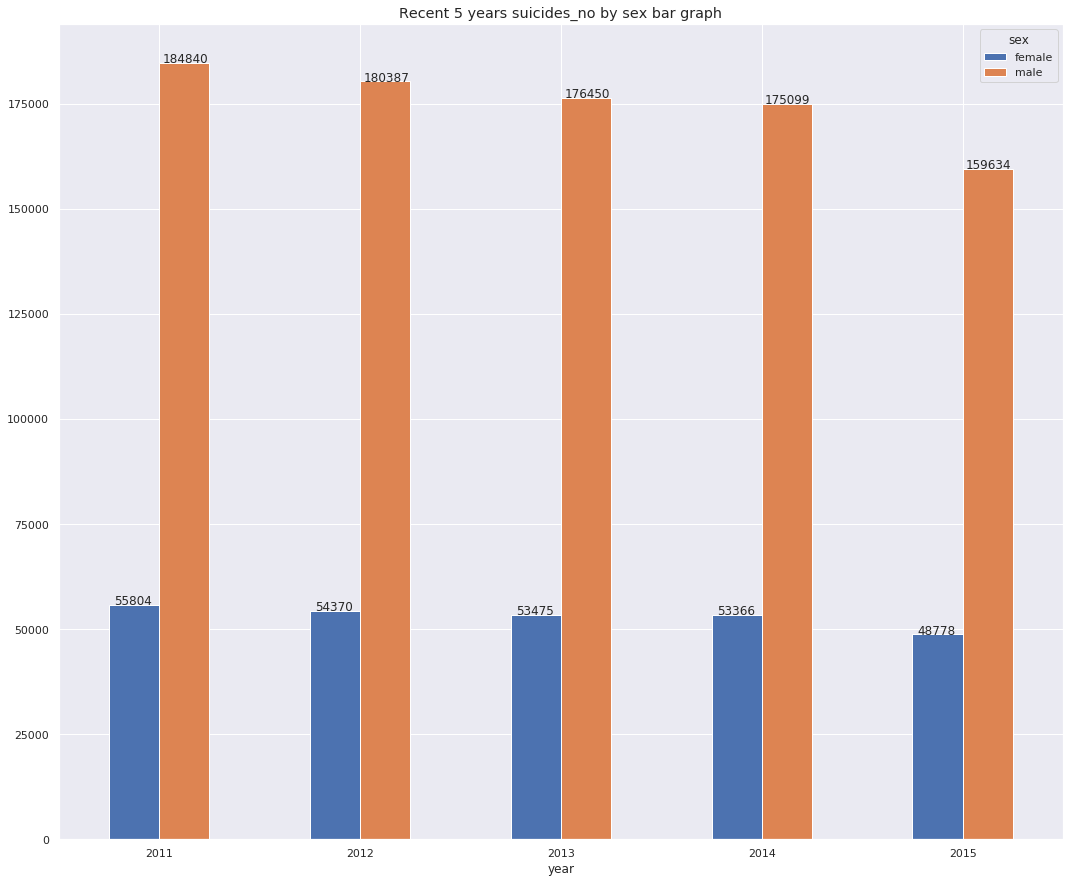

In [140]:
fivesexyear=sexPivot.iloc[-5:,]
z1=fivesexyear.plot(kind='bar',figsize=(18,15))
z1.get_figure()
plt.title('Recent 5 years suicides_no by sex bar graph',fontsize='large')
plt.xticks(range(fivesexyear.index.shape[0]),fivesexyear.index,rotation=0)
x=np.arange(fivesexyear.index.shape[0])
y1=np.array(fivesexyear['female'])
y2=np.array(fivesexyear['male'])
for i,j in zip(x,y1):
  plt.text(i-0.13,j,'%d'%j,ha='center')
else:
  pass
for i,j in zip(x,y2):
  plt.text(i+0.13,j,'%d'%j,ha='center')
else:
  pass
plt.savefig('/content/Drive/My Drive/sucides_bar.png')
plt.show()

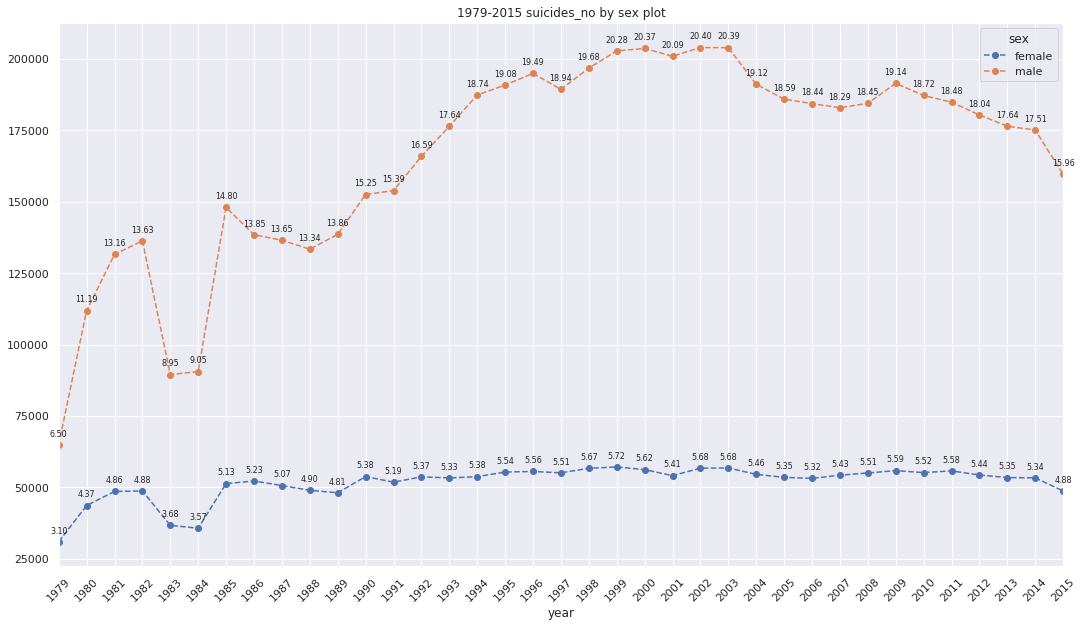

In [121]:
t1=sexPivot.plot(figsize=(18,10),linestyle='--',marker='o')
t1.get_figure()
plt.title('1979-2015 suicides_no by sex plot')
plt.xticks(range(sexPivot.index.shape[0]),sexPivot.index,rotation=45)
x=np.array(sexPivot.loc[:,'female'])
y=np.array(sexPivot.loc[:,'male'])
n=np.arange(sexPivot.index.shape[0])
d=10000
for i,j in zip(n,x):
  plt.text(i,j+d-7000,'%1.2f'%(j/d),ha='center',fontsize=8)
else:
  pass
for i,j in zip(n,y):
  plt.text(i,j+d-7000,'%1.2f'%(j/d),ha='center',fontsize=8)
else:
  pass
plt.savefig('/content/Drive/My Drive/suicides_plot.png')
plt.show()

In [32]:
agePivot=pd.pivot_table(original,index='year',columns='age',values='suicides_no',aggfunc=np.sum)
agePivot.tail()

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
2012,27147.0,37477.0,83830.0,1995.0,59329.0,24979.0
2013,25804.0,36578.0,82154.0,2039.0,58770.0,24580.0
2014,25273.0,36592.0,80645.0,2132.0,58570.0,25253.0
2015,22919.0,33198.0,72675.0,1855.0,54334.0,23431.0
2016,1390.0,2287.0,6170.0,180.0,4997.0,1963.0


In [34]:
agePivot.drop(index='2016',inplace=True)
agePivot.tail()

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
2011,28701.0,38699.0,86581.0,2079.0,59983.0,24601.0
2012,27147.0,37477.0,83830.0,1995.0,59329.0,24979.0
2013,25804.0,36578.0,82154.0,2039.0,58770.0,24580.0
2014,25273.0,36592.0,80645.0,2132.0,58570.0,25253.0
2015,22919.0,33198.0,72675.0,1855.0,54334.0,23431.0


In [41]:
fiveyear=agePivot.iloc[-5:,:]
fiveyear

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
2011,28701.0,38699.0,86581.0,2079.0,59983.0,24601.0
2012,27147.0,37477.0,83830.0,1995.0,59329.0,24979.0
2013,25804.0,36578.0,82154.0,2039.0,58770.0,24580.0
2014,25273.0,36592.0,80645.0,2132.0,58570.0,25253.0
2015,22919.0,33198.0,72675.0,1855.0,54334.0,23431.0


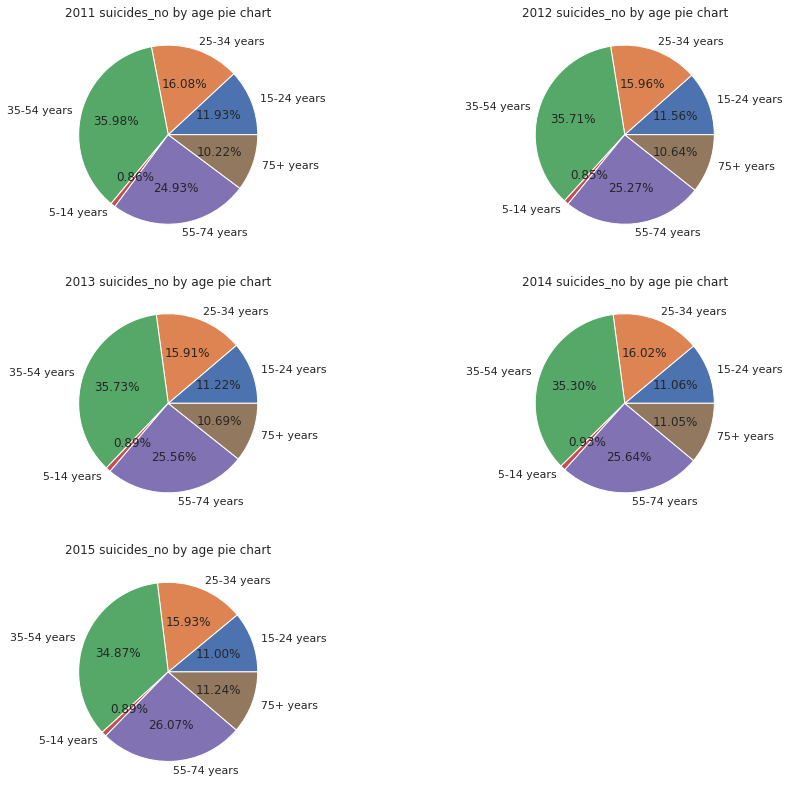

In [46]:
z2=plt.figure(figsize=(15,14))
label=fiveyear.columns
for i in range(fiveyear.index.shape[0]):
  z2.add_subplot(3,2,i+1)
  plt.pie(fiveyear.iloc[i,:],labels=label,autopct='%1.2f%%')
  plt.title('%s suicides_no by age pie chart'%fiveyear.index[i])
else:
  z2.savefig(r'/content/Drive/My Drive/agepie.png')
  plt.show()

In [48]:
countryGroup=original.groupby(by='country')
countrySui=countryGroup.sum()['suicides_no']
countrySui.head()

country
Albania                 3482.0
Anguilla                   2.0
Antigua and Barbuda       11.0
Argentina              93862.0
Armenia                 2926.0
Name: suicides_no, dtype: float64

In [52]:
countrySui=countrySui.sort_values(ascending=False)
countrySui.head()

country
Russian Federation          1501328.0
United States of America    1201569.0
Japan                        937614.0
France                       395500.0
Ukraine                      365338.0
Name: suicides_no, dtype: float64

In [53]:
countrySuicide=pd.DataFrame(countrySui)
countrySuicide.head()

,suicides_no
country,
Russian Federation,1501328.0
United States of America,1201569.0
Japan,937614.0
France,395500.0
Ukraine,365338.0


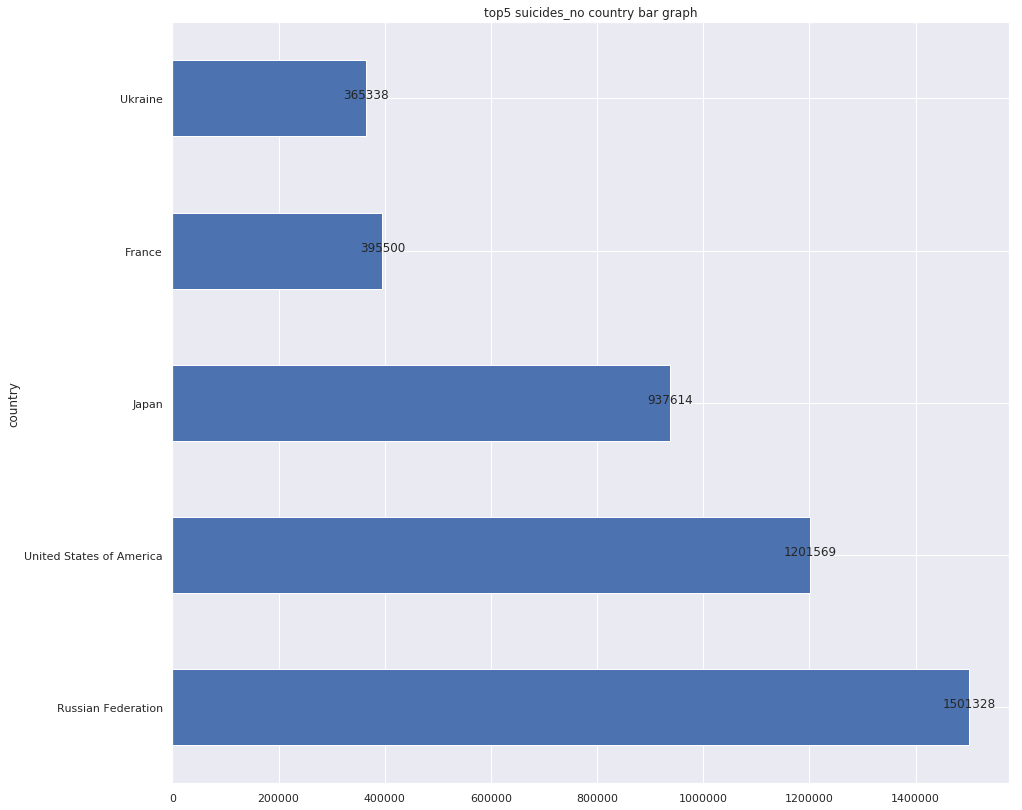

In [92]:
z3=countrySuicide.iloc[:5,:].plot(kind='barh',figsize=(15,14),legend=False)
z3.get_figure()
plt.title('top5 suicides_no country bar graph')
x=np.array(countrySuicide.iloc[:5])
y=np.arange(5)
for i,j in zip(y,x):
  plt.text(j,i,'%d'%j,ha='center')
else:
  pass
plt.savefig(r'/content/Drive/My Drive/top5.png')
plt.show()

In [97]:
YearGroup=original.groupby(by='year')
YearGroupSum=YearGroup.sum()
YearGroupSum.tail()

,suicides_no,population
year,,
2012,234757.0,2.105975e+09
2013,229925.0,2.230992e+09
2014,228465.0,2.213208e+09
2015,208412.0,1.980632e+09
2016,16987.0,5.437110e+08


In [0]:
YearGroupSum.drop(index='2016',inplace=True)

In [99]:
YearGroupSum.tail()

,suicides_no,population
year,,
2011,240644.0,2.172939e+09
2012,234757.0,2.105975e+09
2013,229925.0,2.230992e+09
2014,228465.0,2.213208e+09
2015,208412.0,1.980632e+09


In [100]:
YearGroupSum['suicides_rate(%)']=(YearGroupSum['suicides_no']/YearGroupSum['population'])*100
YearGroupSum.tail()

,suicides_no,population,suicides_rate(%)
year,,,
2011,240644.0,2.172939e+09,0.011075
2012,234757.0,2.105975e+09,0.011147
2013,229925.0,2.230992e+09,0.010306
2014,228465.0,2.213208e+09,0.010323
2015,208412.0,1.980632e+09,0.010523


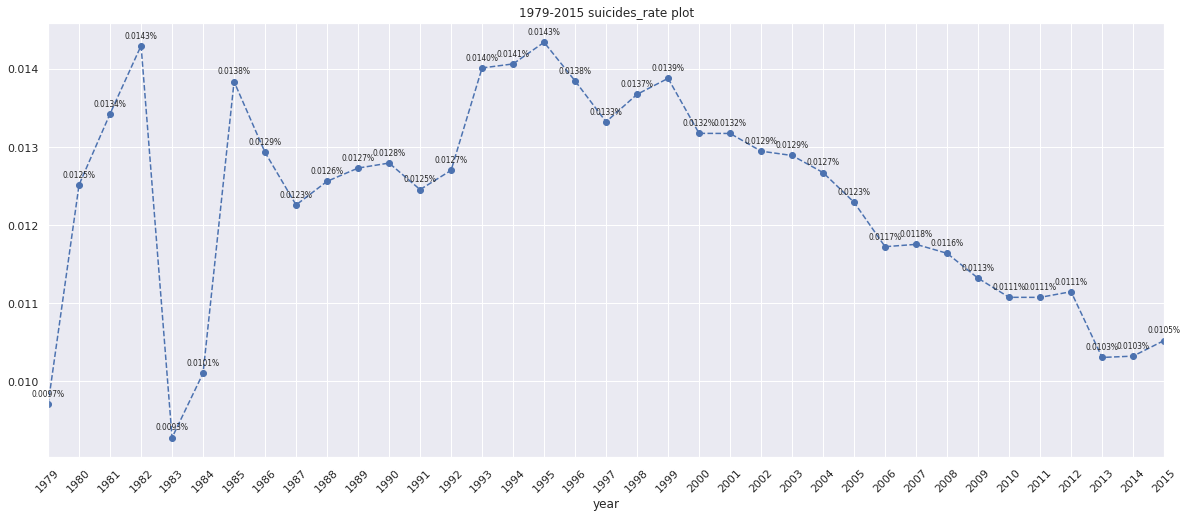

In [141]:
z4=YearGroupSum['suicides_rate(%)'].plot(figsize=(20,8),linestyle='--',marker='o')
z4.get_figure()
plt.title('1979-2015 suicides_rate plot')
plt.xticks(range(YearGroupSum.index.shape[0]),YearGroupSum.index,rotation=45)
n=np.arange(YearGroupSum.index.shape[0])
x=np.array(YearGroupSum['suicides_rate(%)'])
for i,j in zip(n,x):
  plt.text(i,j+0.0001,'%1.4f%%'%j,ha='center',fontsize=7.5)
else:
  pass
plt.savefig(r'/content/Drive/My Drive/suicides_rate_plot.png')
plt.show()